#Insatallation of transformer datasets

In [1]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00


#Import Statements

In [2]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast)

#Data Preparation

In [3]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bitext/training-dataset-for-chatbotsvirtual-assistants

  0% 0.00/1.16M [00:00<?, ?B/s]
100% 1.16M/1.16M [00:00<00:00, 51.3MB/s]


In [4]:
!unzip "/content/training-dataset-for-chatbotsvirtual-assistants.zip" -d "/content/dataset/"

Archive:  /content/training-dataset-for-chatbotsvirtual-assistants.zip
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.xlsx  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/LICENSE.txt  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext

In [5]:
dataset=load_dataset("csv",
                       data_files="/content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")

Generating train split: 0 examples [00:00, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent'],
        num_rows: 21534
    })
})

In [7]:
dataset['train'][1]

{'flags': 'BILQZ',
 'utterance': 'can you tell me if i can regisger two accounts with a single email address?',
 'category': 'ACCOUNT',
 'intent': 'create_account'}

In [8]:
dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 'create_account'}

In [9]:
#LIst the differents intents we have into the dataset
intents = list(set(dataset['train']['intent']))
dict_intents={intents[i]: i for i in range(len(intents))}
print(dict_intents)
print(len(intents))

{'delete_account': 0, 'complaint': 1, 'check_payment_methods': 2, 'change_shipping_address': 3, 'check_cancellation_fee': 4, 'registration_problems': 5, 'cancel_order': 6, 'review': 7, 'set_up_shipping_address': 8, 'delivery_period': 9, 'payment_issue': 10, 'create_account': 11, 'get_refund': 12, 'newsletter_subscription': 13, 'track_refund': 14, 'switch_account': 15, 'contact_customer_service': 16, 'place_order': 17, 'track_order': 18, 'check_invoices': 19, 'contact_human_agent': 20, 'recover_password': 21, 'get_invoice': 22, 'check_refund_policy': 23, 'edit_account': 24, 'delivery_options': 25, 'change_order': 26}
27


In [10]:
intents = list(set(dataset['train']['intent']))
print(intents)

['delete_account', 'complaint', 'check_payment_methods', 'change_shipping_address', 'check_cancellation_fee', 'registration_problems', 'cancel_order', 'review', 'set_up_shipping_address', 'delivery_period', 'payment_issue', 'create_account', 'get_refund', 'newsletter_subscription', 'track_refund', 'switch_account', 'contact_customer_service', 'place_order', 'track_order', 'check_invoices', 'contact_human_agent', 'recover_password', 'get_invoice', 'check_refund_policy', 'edit_account', 'delivery_options', 'change_order']


In [11]:
# Define a function to preprocess the dataset,
#so that we could get the intered info from the user and it specific intent

In [12]:
def preprocess(dataset):
  return {'utterance':dataset['utterance'],
          'intent':dict_intents[dataset['intent']]}

In [13]:
#Apply the preprocess function to our dataset
pre_dataset=dataset.map(preprocess)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [14]:
pre_dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent'],
        num_rows: 21534
    })
})

In [15]:
pre_dataset['train'][1]

{'flags': 'BILQZ',
 'utterance': 'can you tell me if i can regisger two accounts with a single email address?',
 'category': 'ACCOUNT',
 'intent': 11}

In [16]:
pre_dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 11}

In [17]:
pre_dataset['train'][7800]

{'flags': 'BL',
 'utterance': 'how to speak with a human agent',
 'category': 'CONTACT',
 'intent': 20}

In [18]:
#Tokenize the dataset(input- utterance) using deberta model from huggingFace

In [19]:
model_id="microsoft/deberta-base"
tokenizer=DebertaTokenizerFast.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

In [20]:
def tokenizer_function(dataset):
  return tokenizer(dataset["utterance"],)

In [21]:
tokenized_dataset = pre_dataset.map(tokenizer_function)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [22]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21534
    })
})

In [23]:
tokenized_dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 11,
 'input_ids': [1,
  100,
  218,
  75,
  33,
  41,
  804,
  1316,
  6,
  99,
  109,
  38,
  33,
  7,
  109,
  7,
  5124,
  116,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [24]:
tokenized_dataset['train'][1]

{'flags': 'BILQZ',
 'utterance': 'can you tell me if i can regisger two accounts with a single email address?',
 'category': 'ACCOUNT',
 'intent': 11,
 'input_ids': [1,
  7424,
  47,
  1137,
  162,
  114,
  939,
  64,
  6701,
  354,
  2403,
  80,
  2349,
  19,
  10,
  881,
  1047,
  1100,
  116,
  2],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [25]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [26]:
BATCH_SIZE=16

In [27]:
tf_dataset = tokenized_dataset["train"].to_tf_dataset(
    columns=['input_ids','attention_mask', 'intent'],
    shuffle=True,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)

You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [28]:
def swap_position(dataset):
  return {'input_ids':dataset['input_ids'],
          'attention_mask':dataset['attention_mask'],}, dataset['intent']

In [29]:
tf_dataset=tf_dataset.map(swap_position)

In [30]:
tf_dataset

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [31]:
train_dataset=tf_dataset.take(int(0.9*len(tf_dataset)))
val_dataset=tf_dataset.skip(int(0.9*len(tf_dataset)))

In [32]:
for i in val_dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(16, 23), dtype=int64, numpy=
array([[    1, 17304,  1717,  1394,    41,  2936,   147,     7,  1349,
          127, 11310,     6,  2540,   116,     2,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    1,   100,   218,    75,   236,   127,  3018,  1316,     6,
          141,   385,  5016,    38,  3438,    24,   116,     2,     0,
            0,     0,     0,     0,     0],
       [    1, 17304,    47,  1394,    41,  2936,     7,   694,   335,
           59,   127,  4033,     6,  2540, 17487,     2,     0,     0,
            0,     0,     0,     0,     0],
       [    1,  7424,    47,  1137,   162,   114,   939,    64,  1045,
           80, 23523,   804,  2349,    19,     5,   276,  1047,  1100,
          116,     2,     0,     0,     0],
       [    1,   100,   685,   127,  4033,     6,    38,   240,   244,
         7603,   106,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       

# **Model Building**

#Modeling with TFDebertaForSequenceClassification

In [33]:
model = TFDebertaForSequenceClassification.from_pretrained(model_id, num_labels=len(intents))
model.summary()

tf_model.h5:   0%|          | 0.00/555M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier', 'cls_dropout', 'pooler']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLaye  multiple                  138601728 
 r)                                                              
                                                                 
 pooler (TFDebertaContextPo  multiple                  590592    
 oler)                                                           
                                                                 
 cls_dropout (TFDebertaStab  multiple                  0         
 leDropout)                                                      
                                                                 
 classifier (Dense)          multiple                  20763     
                                                                 
Total params: 139213083 (531.06 MB)
Trainable params: 139213083 (531.06 MB)
Non-trainable para

#TRaining the model

In [34]:
num_epochs = 2
batches_per_epoch = len(tokenized_dataset["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * num_epochs)

In [35]:
optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps)

In [36]:
model.compile(optimizer=optimizer,
    metrics=["accuracy"])

In [37]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2,)

Epoch 1/2


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


1211/1211 [==============================] - 359s 227ms/step - loss: 0.3034 - accuracy: 0.9275 - val_loss: 0.0048 - val_accuracy: 0.9995
Epoch 2/2
1211/1211 [==============================] - 261s 216ms/step - loss: 0.0079 - accuracy: 0.9991 - val_loss: 0.0014 - val_accuracy: 1.0000


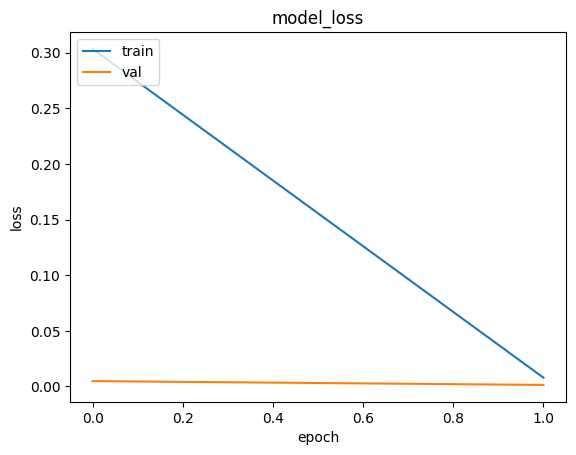

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

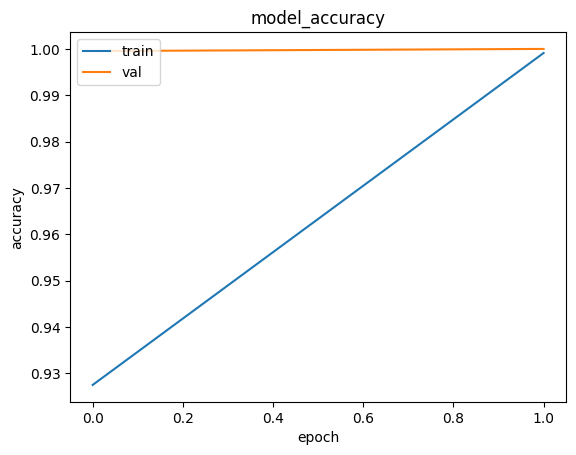

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Model Evaluation

In [40]:
#Confusion matrix

In [41]:
predicted = []
labels = []

for input, label in val_dataset:
  predicted.append(model(**input).logits)
  labels.append(label.numpy())

In [42]:
print(predicted)
print(labels)

[<tf.Tensor: shape=(16, 27), dtype=float32, numpy=
array([[-1.06973839e+00, -3.14275295e-01, -4.97345448e-01,
        -1.53573012e+00, -1.00409651e+00, -7.31336176e-01,
        -1.38248777e+00, -1.06360078e-01, -2.56498665e-01,
        -3.75276506e-02, -1.30202925e+00, -1.64272332e+00,
        -9.70829248e-01, -1.96930364e-01, -1.16470361e+00,
        -3.69069308e-01,  9.98845482e+00, -1.21531987e+00,
         1.14437871e-01, -9.53701854e-01, -8.57468128e-01,
        -2.88741684e+00, -1.19222283e-01, -4.44592357e-01,
        -7.75698841e-01, -4.08305705e-01, -1.58455098e+00],
       [ 9.71197510e+00, -2.45319411e-01, -9.92073119e-01,
        -1.76993048e+00, -9.73787308e-01, -1.26203939e-01,
         6.71423912e-01, -8.30915272e-01, -1.10373080e+00,
        -3.19113761e-01, -6.59792364e-01, -7.69059062e-01,
        -1.58120364e-01, -6.01613104e-01, -9.40172136e-01,
         3.84253770e-01, -4.38349754e-01, -1.16784406e+00,
        -1.52393207e-01, -8.68902504e-01, -3.57825220e-01,
    

In [43]:
print(tf.argmax(predicted[:-1],axis=-1).numpy())
print(labels[:-1])

[[16  0 11 ... 10 10  9]
 [10 16 11 ... 10  2 16]
 [10 16 11 ... 11 16 12]
 ...
 [16 10 10 ... 19 16 16]
 [15 10 11 ... 10 10 26]
 [10 10  7 ... 20 23 18]]
[array([16,  0, 11, 26, 10, 10, 22, 22, 22, 18,  4, 10,  0, 10, 10,  9]), array([10, 16, 11, 10, 13,  7, 16, 21, 10,  6, 13, 21, 10, 10,  2, 16]), array([10, 16, 11, 11, 19, 23, 26, 16,  0,  2, 23, 24, 12, 11, 16, 12]), array([10,  7, 26,  4, 18,  0, 26, 19, 10, 10, 26, 12, 11,  3, 20,  7]), array([10, 21,  0, 19, 19, 23, 12, 26, 26, 22, 11, 22, 26, 11, 26, 22]), array([11, 16, 16, 23, 19, 10, 22, 22, 19, 21, 12, 10, 20, 21, 10, 11]), array([16, 20, 26, 16, 15, 10, 11, 21,  1, 10, 10, 10, 11, 18, 17, 18]), array([20, 18,  3,  1, 19, 18, 10, 20, 25,  1, 10, 20, 10, 19, 22, 10]), array([10, 21,  3, 10,  8, 11, 22, 10, 12, 10,  5, 10,  2, 10,  0, 25]), array([10, 22, 11, 10, 18, 10, 18, 18,  2, 22, 11, 11, 20, 17, 16,  7]), array([12, 10, 11, 11, 12, 16, 10, 12, 23, 22, 21, 11, 20, 24, 11, 11]), array([26, 11, 22, 13, 10, 21, 21, 10, 2

In [44]:
print(np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[16  0 11 ... 15 26 10]
[16  0 11 ... 15 26 10]


In [45]:
pred=np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()])
lab=np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])

[[ 88   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0  78   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  12   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  54   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 

Text(0.5, 146.7222222222222, 'Predicted')

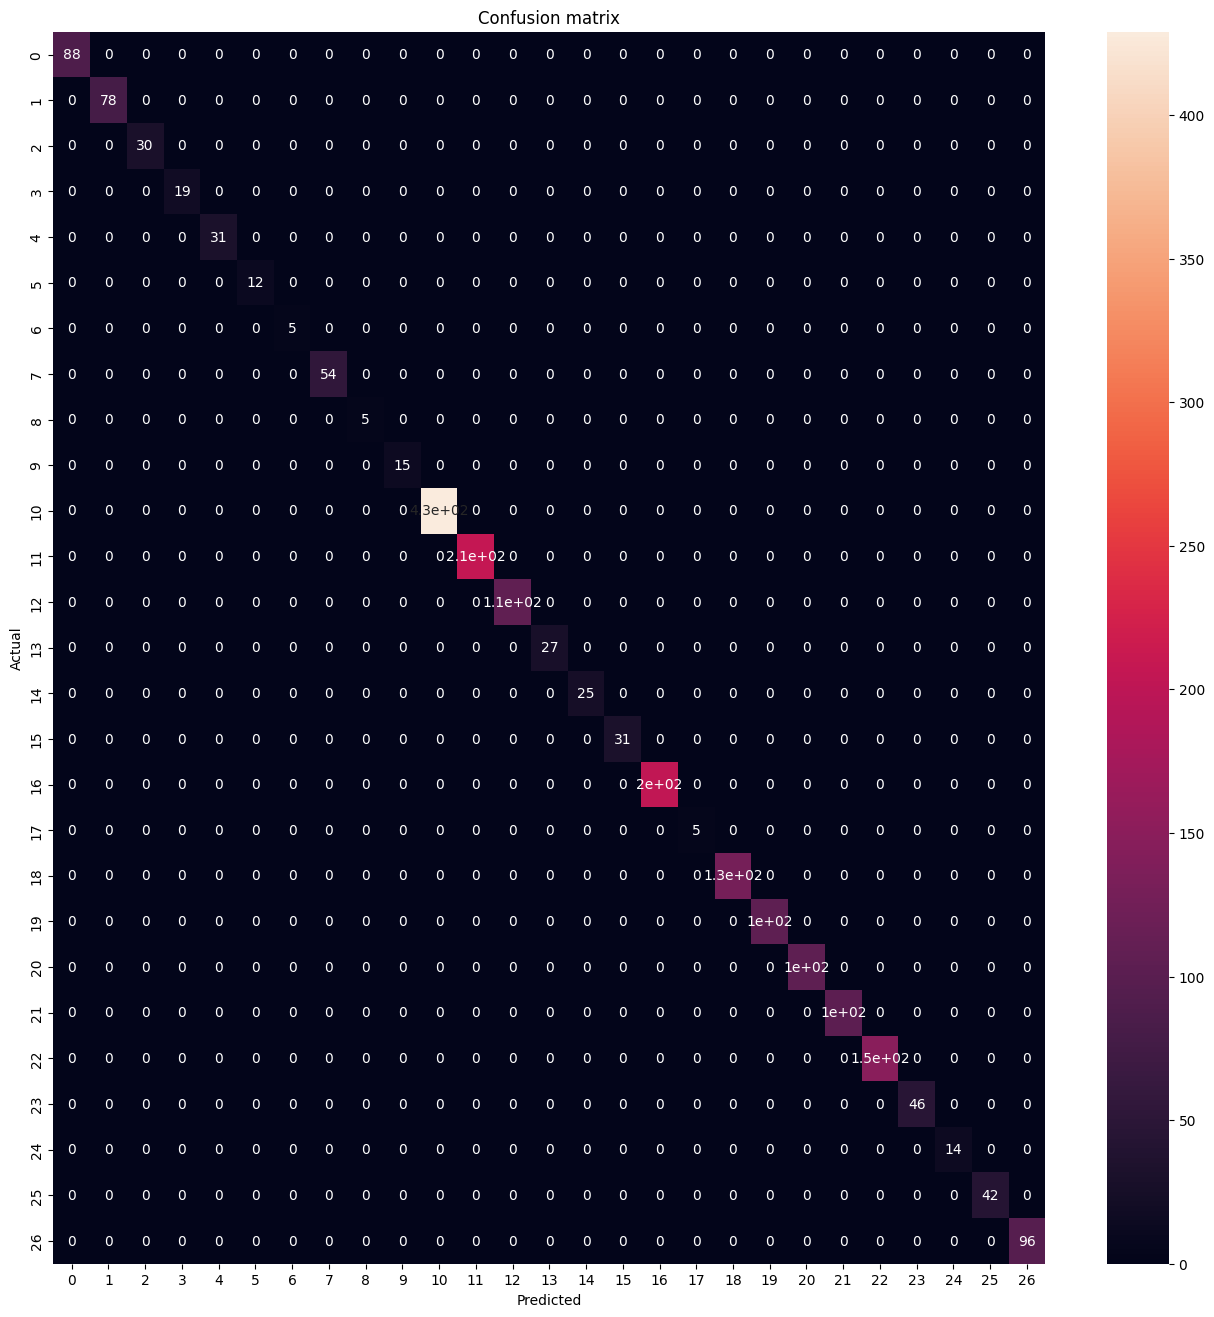

In [46]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(16,16))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# **Model Testing**

In [47]:
inputs = tokenizer(["Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change"
                    ], padding=True,return_tensors="tf")

logits = model(**inputs).logits
outputs=tf.argmax(logits,axis=-1).numpy()

In [48]:
print(outputs)

[11 15  2 26]


In [49]:
reverse_dict_intents={i:intents[i] for i in range(len(intents))}
print(reverse_dict_intents)

{0: 'delete_account', 1: 'complaint', 2: 'check_payment_methods', 3: 'change_shipping_address', 4: 'check_cancellation_fee', 5: 'registration_problems', 6: 'cancel_order', 7: 'review', 8: 'set_up_shipping_address', 9: 'delivery_period', 10: 'payment_issue', 11: 'create_account', 12: 'get_refund', 13: 'newsletter_subscription', 14: 'track_refund', 15: 'switch_account', 16: 'contact_customer_service', 17: 'place_order', 18: 'track_order', 19: 'check_invoices', 20: 'contact_human_agent', 21: 'recover_password', 22: 'get_invoice', 23: 'check_refund_policy', 24: 'edit_account', 25: 'delivery_options', 26: 'change_order'}


In [50]:
for i in outputs:
  print(reverse_dict_intents[i])

create_account
switch_account
check_payment_methods
change_order
